In [3]:

# Import necessary libraries
import torch
from PIL import Image
import requests
from io import BytesIO


In [4]:
# Step 1: Load the pre-trained YOLOv5s model (small version)
print("Loading YOLOv5 model...")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load the small YOLOv5 model
print("Model Loaded!")


Loading YOLOv5 model...


Using cache found in C:\Users\aakan/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-17 Python-3.12.3 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model Loaded!


In [5]:
# Step 2: Load the image (can be a local file or a URL)
img_path = "C:\\Users\\aakan\\OneDrive\\Pictures\\Screenshots\\Screenshot 2025-04-20 134129.png"  # Replace with your local image path or URL
img = Image.open(img_path)


In [6]:

# Step 3: Display the image (optional)
img.show()

# Step 4: Perform inference on the image
results = model(img)

# Step 5: Print the results
results.print()  # Prints the detected objects and their confidence scores


C:\Users\aakan/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 404x757 1 bird, 1 cat, 2 dogs
Speed: 13.5ms pre-process, 91.5ms inference, 15.6ms NMS per image at shape (1, 3, 352, 640)


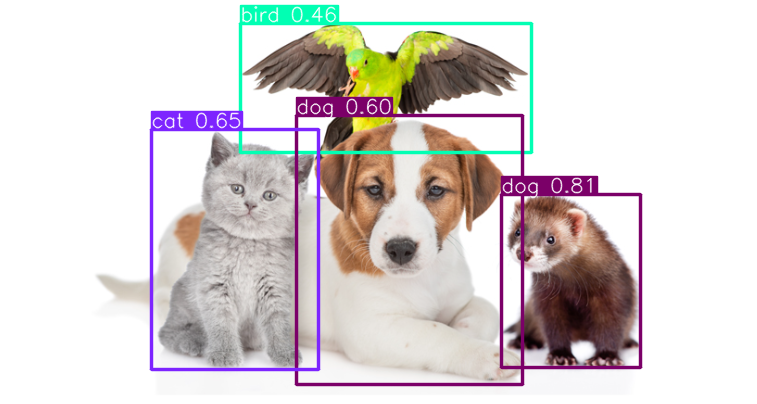

Saved 1 image to runs\detect\exp


Detected Labels (Class IDs): tensor([16., 15., 16., 14.])
Detected Bounding Boxes and Confidence Scores: tensor([[0.66289, 0.48129, 0.84607, 0.91028, 0.81141],
        [0.19958, 0.32120, 0.42049, 0.91434, 0.64795],
        [0.39159, 0.28608, 0.68987, 0.95247, 0.59959],
        [0.31778, 0.05789, 0.70214, 0.37714, 0.45564]])
Detected Object: dog, Confidence: 0.9103
Detected Object: cat, Confidence: 0.9143
Detected Object: dog, Confidence: 0.9525
Detected Object: bird, Confidence: 0.3771


In [7]:
# Step 6: Display the results (bounding boxes, labels, and confidence scores)
results.show()  # This will show the image with detected bounding boxes

# Step 7: Save the results (optional)
results.save()  # Saves the image with bounding boxes in the 'runs/detect/exp' folder

# Step 8: Accessing the detection results
# Get the detected labels, bounding boxes, and confidence scores
labels, cords = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

# Print the labels and coordinates of the detected objects
print("Detected Labels (Class IDs):", labels)
print("Detected Bounding Boxes and Confidence Scores:", cords)

# Step 9: Convert the results to a human-readable format
# You can map the class ids to the actual labels (COCO class names)
LABELS = [
    "person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", 
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", 
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "chair", "couch", 
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", 
    "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", 
    "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Mapping class ids to class names
for label, cord in zip(labels, cords):
    class_name = LABELS[int(label)]
    print(f"Detected Object: {class_name}, Confidence: {cord[-2]:.4f}")